In [28]:
import joblib
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
# Load the dataset
file_path = "D:\Github_Project\project_test\project3\Land_prediction_model\LAND_PRICE_PREDICTION.csv"
df = pd.read_csv(file_path)

In [30]:
df.head(1)

,ID,City/District,State,Locality,Land Type,Area (sq. ft),Price (INR),Price per sq. ft (INR),Road Width (m),Distance to Nearest City (km),Distance to Highway (km),Proximity to Amenities,Property Use,Market Trend (%),Latitude,Longitude
0,1,Rajkot,Gujarat,University Rd,Industrial,3137,12259396,3908,13,31.98,16.52,Medium,Industrial,4.62,23.132248,72.204572


In [31]:
df.isnull().sum()

ID                               0
City/District                    0
State                            0
Locality                         0
Land Type                        0
Area (sq. ft)                    0
Price (INR)                      0
Price per sq. ft (INR)           0
Road Width (m)                   0
Distance to Nearest City (km)    0
Distance to Highway (km)         0
Proximity to Amenities           0
Property Use                     0
Market Trend (%)                 0
Latitude                         0
Longitude                        0
dtype: int64

In [32]:
df.head(1)

,ID,City/District,State,Locality,Land Type,Area (sq. ft),Price (INR),Price per sq. ft (INR),Road Width (m),Distance to Nearest City (km),Distance to Highway (km),Proximity to Amenities,Property Use,Market Trend (%),Latitude,Longitude
0,1,Rajkot,Gujarat,University Rd,Industrial,3137,12259396,3908,13,31.98,16.52,Medium,Industrial,4.62,23.132248,72.204572


In [33]:
column_names = df.columns
print(column_names)

Index(['ID', 'City/District', 'State', 'Locality', 'Land Type',
       'Area (sq. ft)', 'Price (INR)', 'Price per sq. ft (INR)',
       'Road Width (m)', 'Distance to Nearest City (km)',
       'Distance to Highway (km)', 'Proximity to Amenities', 'Property Use',
       'Market Trend (%)', 'Latitude', 'Longitude'],
      dtype='object')


In [34]:
# drop unwanted data 

In [35]:
df1= df.drop(['ID','State','Locality', 'Land Type','Proximity to Amenities', 'Property Use','Market Trend (%)', 'Latitude', 'Longitude'],axis=1)

In [36]:
df1

,City/District,Area (sq. ft),Price (INR),Price per sq. ft (INR),Road Width (m),Distance to Nearest City (km),Distance to Highway (km)
0,Rajkot,3137,12259396,3908,13,31.98,16.52
1,Vadodara,8848,6989920,790,29,43.79,4.66
2,Surat,7288,14422952,1979,9,41.92,16.39
3,Surat,3818,3608010,945,24,47.67,3.15
4,Gandhinagar,4702,12361558,2629,13,24.29,8.41
...,...,...,...,...,...,...,...
4995,Vadodara,1400,6755000,4825,22,40.77,17.36
4996,Rajkot,4554,18152244,3986,8,45.39,18.20
4997,Gandhinagar,8389,31425194,3746,9,44.96,13.80
4998,Rajkot,8445,42225000,5000,10,21.84,8.98


In [37]:
X= df1.drop('Price (INR)',axis=1)

In [38]:
X.head(1)

,City/District,Area (sq. ft),Price per sq. ft (INR),Road Width (m),Distance to Nearest City (km),Distance to Highway (km)
0,Rajkot,3137,3908,13,31.98,16.52


In [39]:
y=df['Price (INR)']

In [40]:
y.head()

0    12259396
1     6989920
2    14422952
3     3608010
4    12361558
Name: Price (INR), dtype: int64

In [41]:
unique_cities = df['City/District'].unique()
print("Unique city names:", unique_cities)

Unique city names: ['Rajkot' 'Vadodara' 'Surat' 'Gandhinagar' 'Ahmedabad']


In [42]:
le = LabelEncoder()
X['City'] = le.fit_transform(X['City/District'])

In [43]:
X

,City/District,Area (sq. ft),Price per sq. ft (INR),Road Width (m),Distance to Nearest City (km),Distance to Highway (km),City
0,Rajkot,3137,3908,13,31.98,16.52,2
1,Vadodara,8848,790,29,43.79,4.66,4
2,Surat,7288,1979,9,41.92,16.39,3
3,Surat,3818,945,24,47.67,3.15,3
4,Gandhinagar,4702,2629,13,24.29,8.41,1
...,...,...,...,...,...,...,...
4995,Vadodara,1400,4825,22,40.77,17.36,4
4996,Rajkot,4554,3986,8,45.39,18.20,2
4997,Gandhinagar,8389,3746,9,44.96,13.80,1
4998,Rajkot,8445,5000,10,21.84,8.98,2


In [44]:
# Drop City/ District column
X= df1.drop('City/District',axis=1)

In [46]:
X.head()

,Area (sq. ft),Price (INR),Price per sq. ft (INR),Road Width (m),Distance to Nearest City (km),Distance to Highway (km)
0,3137,12259396,3908,13,31.98,16.52
1,8848,6989920,790,29,43.79,4.66
2,7288,14422952,1979,9,41.92,16.39
3,3818,3608010,945,24,47.67,3.15
4,4702,12361558,2629,13,24.29,8.41


In [47]:
y.head()

0    12259396
1     6989920
2    14422952
3     3608010
4    12361558
Name: Price (INR), dtype: int64

In [48]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)


In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 6), (1000, 6), (4000,), (1000,))

In [61]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred

array([21426202.81,  3392499.21,  7774203.66, ...,  1130459.24,
       26519800.79, 24726571.51])

In [63]:
# Model evaluation
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest Model Performance:\nR² Score: {r2:.4f}\nRMSE: {rmse:.2f}")


Random Forest Model Performance:
R² Score: 1.0000
RMSE: 14264.78


In [64]:
import pickle

# Save the trained model to a new pickle file
pickle.dump(rf_model, open('land_random_forest_model.pkl', 'wb'))

# Save the scaler to a new pickle file
pickle.dump(scaler, open('land_scaler.pkl', 'wb'))

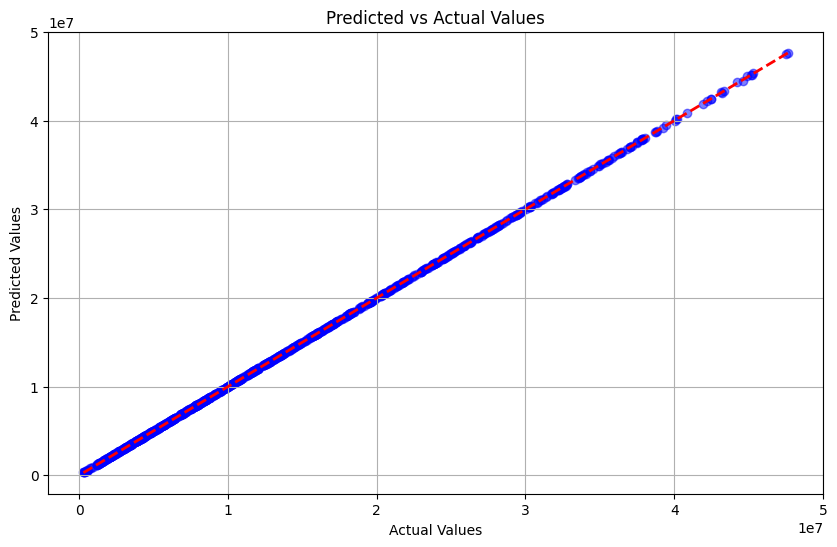

In [65]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()